# Task 2: Orientation

**Objective**

Find out for every house which direction it faces (eg is it north facing?). Produce an output file where it's one row per property and include columns for address and orientation.

## 1. Install Required Libraries

In [1]:
# Import basic libraries
import pandas as pd
import geopandas as gpd
import numpy as np
from pathlib import Path

# Install geopandas and dependencies if not available
import subprocess
import sys

try:
    import geopandas as gpd
    print("✓ geopandas already installed")
except ImportError:
    print("Installing geopandas...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "geopandas", "shapely", "pyproj"])
    import geopandas as gpd
    print("✓ geopandas installed successfully")

✓ geopandas already installed


## 2. Load Data

In [2]:
# Load property addresses from GNAF
properties_df = pd.read_parquet('../data/hiring_quiz/gnaf_prop.parquet')
print(f"Loaded {len(properties_df)} properties from GNAF")
print(properties_df.shape)
properties_df.head()

Loaded 70591 properties from GNAF
(70591, 30)


,gid,gnaf_pid,street_locality_pid,locality_pid,alias_principal,primary_secondary,building_name,lot_number,flat_number,level_number,...,confidence,legal_parcel_id,mb_2016_code,mb_2021_code,latitude,longitude,geocode_type,reliability,geom,schema
0,3115,GANSW705858629,NSW2878308,locc9618e9a6979,P,None,None,1,None,None,...,2,1/105203,10840311000,10840311000,-33.787478,151.182595,PROPERTY CENTROID,2,0101000020BB100000E599B8D1D7E562406816D312CCE4...,gnaf_202402
1,3120,GANSW705858630,NSW2878308,locc9618e9a6979,P,None,None,26,None,None,...,2,26/7045,10840312000,10840312000,-33.787164,151.183209,PROPERTY CENTROID,2,0101000020BB1000008215D0D9DCE562403E3335C7C1E4...,gnaf_202402
2,3123,GANSW705858631,NSW2878308,locc9618e9a6979,P,None,None,16,None,None,...,2,15/455712,10840311000,10840311000,-33.787375,151.182549,PROPERTY CENTROID,2,0101000020BB100000E8F3B470D7E562406A31BAB4C8E4...,gnaf_202402
3,3126,GANSW705858632,NSW2878308,locc9618e9a6979,P,None,None,27,None,None,...,2,27/7045,10840312000,10840312000,-33.787023,151.183146,PROPERTY CENTROID,2,0101000020BB1000009DEE2354DCE56240D5DAEA28BDE4...,gnaf_202402
4,3130,GANSW705858633,NSW2878308,locc9618e9a6979,P,None,None,1,None,None,...,2,1/963791,10840311000,10840311000,-33.787273,151.182502,PROPERTY CENTROID,2,0101000020BB1000005048190ED7E5624024456458C5E4...,gnaf_202402


In [3]:
# Load cadastral boundaries
cadastre_gdf = gpd.read_file('../data/hiring_quiz/cadastre.gpkg')
print(f"\nLoaded {len(cadastre_gdf)} cadastral parcels")
print(cadastre_gdf.shape)
cadastre_gdf.head()


Loaded 1294 cadastral parcels
(1294, 3)


,state,sa4,geometry
0,NSW,Sydney - North Sydney and Hornsby,"MULTIPOLYGON (((151.21055 -33.7947, 151.21112 ..."
1,NSW,Sydney - North Sydney and Hornsby,"MULTIPOLYGON (((151.21074 -33.79414, 151.21102..."
2,NSW,Sydney - North Sydney and Hornsby,"MULTIPOLYGON (((151.21103 -33.79528, 151.21169..."
3,NSW,Sydney - North Sydney and Hornsby,"MULTIPOLYGON (((151.21126 -33.79559, 151.21139..."
4,NSW,Sydney - North Sydney and Hornsby,"MULTIPOLYGON (((151.21182 -33.79607, 151.21182..."


In [4]:
# Load road boundaries
roads_gdf = gpd.read_file('../data/hiring_quiz/roads.gpkg')
print(f"\nLoaded {len(roads_gdf)} road segments")
print(roads_gdf.shape)
roads_gdf.head()


Loaded 173 road segments
(173, 15)


,osm_id,code,fclass,name,layer,bridge,tunnel,fname,type,width,population,ref,oneway,maxspeed,geometry
0,1081034612,5154,path,None,1.0,T,F,gis_osm_roads_free_1,None,None,None,None,B,0.0,"LINESTRING (151.22193 -33.80488, 151.22195 -33..."
1,868422498,5155,steps,None,0.0,F,F,gis_osm_roads_free_1,None,None,None,None,B,0.0,"LINESTRING (151.22117 -33.80514, 151.22118 -33..."
2,821720812,5154,path,None,0.0,F,F,gis_osm_roads_free_1,None,None,None,None,B,0.0,"LINESTRING (151.21766 -33.80537, 151.21793 -33..."
3,507890155,5141,service,None,0.0,F,F,gis_osm_roads_free_1,None,None,None,None,B,0.0,"LINESTRING (151.21155 -33.79623, 151.21155 -33..."
4,1081035341,5154,path,Harold Reid Foreshore Track,0.0,F,F,gis_osm_roads_free_1,None,None,None,None,B,0.0,"LINESTRING (151.21201 -33.79623, 151.2121 -33...."


In [5]:
# Check coordinate systems
# print(f"properties_df CRS: {properties_df.crs}") 
print(f"\nGNAF CRS: {properties_df.crs if hasattr(properties_df, 'crs') else 'No CRS info'}")
print(f"Cadastre CRS: {cadastre_gdf.crs}")
print(f"Roads CRS: {roads_gdf.crs}")


GNAF CRS: No CRS info
Cadastre CRS: EPSG:4326
Roads CRS: EPSG:4326


## ----- NOTES -----

From the initial review, both the Cadastre and Roads datasets are defined under EPSG:4326, a standard global geographic coordinate system. However, the GNAF dataset does not have any coordinate reference system (CRS) specified. In this analysis , I obmit the use of roads.gpkg

Below is a summary of each file’s contents:

gnaf_prop.parquet – Contains property address data with latitude and longitude coordinates. Each record includes address strings and geographic point geometry for individual properties.

cadastre.gpkg – Provides property boundary polygons representing precise land parcel shapes. Useful for determining property extents and orientation in relation to building footprints.

roads.gpkg – Represents the road network using line geometries. Can be used for distance calculations, proximity analysis, and accessibility assessments.

## 3. Create Property Points from GNAF Data

In [6]:
'''
This code converts a regular pandas DataFrame containing property address data into a GeoPandas GeoDataFrame under the same CRS EPSG:4326, which enables spatial operations and analysis.
'''

# Convert GNAF properties to GeoDataFrame using lat/lon coordinates
properties_gdf = gpd.GeoDataFrame(
    properties_df,
    geometry=gpd.points_from_xy(properties_df.longitude, properties_df.latitude),
    crs='EPSG:4326'
)

# Transform to same CRS as cadastre for spatial operations
properties_gdf = properties_gdf.to_crs(cadastre_gdf.crs)

print(f"Created GeoDataFrame with {len(properties_gdf)} property points")
print(f"Properties CRS after transformation: {properties_gdf.crs}")

# Preview the data
print("\nSample property data:")
print(properties_gdf[['address', 'latitude', 'longitude', 'geometry']].head())

Created GeoDataFrame with 70591 property points
Properties CRS after transformation: EPSG:4326

Sample property data:
              address   latitude   longitude                     geometry
0  10 MELNOTTE AVENUE -33.787478  151.182595   POINT (151.1826 -33.78748)
1  11 MELNOTTE AVENUE -33.787164  151.183209  POINT (151.18321 -33.78716)
2  12 MELNOTTE AVENUE -33.787375  151.182549  POINT (151.18255 -33.78738)
3  13 MELNOTTE AVENUE -33.787023  151.183146  POINT (151.18315 -33.78702)
4  14 MELNOTTE AVENUE -33.787273  151.182502   POINT (151.1825 -33.78727)


In [7]:
print(f"Invalid property geometries: {properties_gdf[~properties_gdf.is_valid].shape[0]}")
print(f"Invalid cadastre geometries: {cadastre_gdf[~cadastre_gdf.is_valid].shape[0]}")
print(f"Null property geometries: {properties_gdf[properties_gdf.geometry.isna()].shape[0]}")
print(f"Null cadastre geometries: {cadastre_gdf[cadastre_gdf.geometry.isna()].shape[0]}")

Invalid property geometries: 0
Invalid cadastre geometries: 0
Null property geometries: 0
Null cadastre geometries: 0


## 4. Calculate Property Orientation

Property orientation is determined by finding the longest side of each cadastral parcel, which typically represents the street frontage. 
The direction this frontage faces indicates the property's orientation.

In [8]:
'''
The calculate_orientation function works by examining each edge of a polygon and finding the longest one. 
It starts by extracting the exterior coordinates of the polygon, then iterates through consecutive coordinate pairs to form edges. 
For each edge, it calculates both the length using the Pythagorean theorem and the bearing (direction) using np.arctan2()
'''

def calculate_orientation(geometry):
    if geometry.geom_type != 'Polygon':
        return 'Unknown'
    
    # Get exterior coordinates
    coords = list(geometry.exterior.coords)
    
    # Calculate length and bearing of each edge
    max_length = 0
    best_bearing = 0
    
    for i in range(len(coords) - 1):
        x1, y1 = coords[i]
        x2, y2 = coords[i + 1]
        
        # Calculate edge length
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        
        # If this is the longest edge so far
        if length > max_length:
            max_length = length
            # Calculate bearing (angle from north)
            bearing = np.arctan2(x2 - x1, y2 - y1)
            best_bearing = np.degrees(bearing)
    
    return best_bearing

'''
The bearing_to_orientation function converts numerical bearings into compass directions. 
It normalizes bearings to a 0-360 degree range and maps them to eight directions (North, Northeast, etc.), each covering 45 degrees. 
North spans both 0 and 360 degrees.
'''
def bearing_to_orientation(bearing):
    """Convert bearing to compass direction"""
    directions = ['North', 'Northeast', 'East', 'Southeast', 'South', 'Southwest', 'West', 'Northwest']
    index = round(bearing % 360 / 45) % 8
    return directions[index]

# Calculate the orientation for each cadastral parcel
# Step 1: Compute the bearing (angle) of the longest edge of each polygon
cadastre_gdf['bearing'] = cadastre_gdf.geometry.apply(calculate_orientation)

# Step 2: Convert the bearing into a compass direction (e.g., North, East, etc.)
cadastre_gdf['orientation'] = cadastre_gdf['bearing'].apply(
    lambda bearing: bearing_to_orientation(bearing) if isinstance(bearing, (int, float)) else 'Unknown'
)

# Display the distribution of orientations for verification
print("Orientation distribution:")
print(cadastre_gdf['orientation'].value_counts())

Orientation distribution:
orientation
Unknown    1294
Name: count, dtype: int64


## 5. Match Properties to Cadastral Parcels

In [9]:
# Spatial join to match properties with cadastral parcels
print("Matching properties to cadastral parcels...")

# Perform spatial join (property points within cadastral polygons)
property_orientations = gpd.sjoin(
    properties_gdf[['gnaf_pid', 'address', 'geometry']], 
    cadastre_gdf[['orientation', 'bearing', 'geometry']], 
    how='left', 
    predicate='within'
)

# Clean up the results
property_orientations = property_orientations.drop(columns=['index_right'])
property_orientations = property_orientations.drop_duplicates(subset=['gnaf_pid'])

print(f"Successfully matched {len(property_orientations[property_orientations['orientation'].notna()])} properties")
print(f"Unmatched properties: {len(property_orientations[property_orientations['orientation'].isna()])}")

# Fill missing orientations
property_orientations['orientation'] = property_orientations['orientation'].fillna('Unknown')

print("\nFinal orientation distribution:")
print(property_orientations['orientation'].value_counts())

Matching properties to cadastral parcels...
Successfully matched 1237 properties
Unmatched properties: 16571

Final orientation distribution:
orientation
Unknown    17808
Name: count, dtype: int64


In [10]:
property_orientations

,gnaf_pid,address,geometry,orientation,bearing
0,GANSW705858629,10 MELNOTTE AVENUE,POINT (151.1826 -33.78748),Unknown,NaN
1,GANSW705858630,11 MELNOTTE AVENUE,POINT (151.18321 -33.78716),Unknown,NaN
2,GANSW705858631,12 MELNOTTE AVENUE,POINT (151.18255 -33.78738),Unknown,NaN
3,GANSW705858632,13 MELNOTTE AVENUE,POINT (151.18315 -33.78702),Unknown,NaN
4,GANSW705858633,14 MELNOTTE AVENUE,POINT (151.1825 -33.78727),Unknown,NaN
...,...,...,...,...,...
6848,GANSW721625391,333A EASTERN VALLEY WAY,POINT (151.20049 -33.78408),Unknown,NaN
7498,GANSW721622499,317-321 EDINBURGH ROAD,POINT (151.22798 -33.79706),Unknown,Unknown
10965,GANSW721651256,"UNIT 2, 15 RICHMOND AVENUE",POINT (151.19606 -33.81119),Unknown,NaN
10975,GANSW721620066,1B REMUERA STREET,POINT (151.20757 -33.80311),Unknown,NaN


In [11]:
unmatched_properties = properties_gdf[~properties_gdf.index.isin(property_orientations.index)]
print(f"Unmatched properties: {len(unmatched_properties)}")

Unmatched properties: 367


## 6. Create Output File

Generate the final output with one row per property including address and orientation.

In [12]:
# Create final output dataframe
output_df = property_orientations[['gnaf_pid', 'address', 'orientation', 'bearing']].copy()

# Round bearing to 1 decimal place for readability
output_df['bearing_degrees'] = pd.to_numeric(output_df['bearing'], errors='coerce').round(1)
output_df = output_df.drop(columns=['bearing'])

# Sort by address for easier reading
output_df = output_df.sort_values('address')

# Save to CSV
output_df.to_csv('property_orientations.csv', index=False)

print(f"\nFirst 10 results:")
print(output_df.head(10))


First 10 results:
             gnaf_pid             address orientation  bearing_degrees
13074  GANSW705829933     1 ABINGDON ROAD     Unknown              NaN
3279   GANSW705836572    1 ADDISON AVENUE     Unknown              NaN
8640   GANSW706419861  1 ALEXANDER AVENUE     Unknown              NaN
5658   GANSW705843772  1 ALEXANDER PARADE     Unknown              NaN
636    GANSW705830346     1 ALISON STREET     Unknown              NaN
16946  GANSW704338066     1 ALLAMBIE ROAD     Unknown              NaN
8125   GANSW705848416      1 ALLAN STREET     Unknown              NaN
14861  GANSW705807574     1 ALLARD AVENUE     Unknown              NaN
14442  GANSW706344769        1 ALPHA ROAD     Unknown              NaN
8200   GANSW705854066     1 AMARNA PARADE     Unknown              NaN


## 7. Analyze Unmatched Properties

This section visualizes and analyzes the properties that could not be matched to cadastral parcels. This helps identify potential data issues or gaps in coverage.

Visualizing unmatched properties...


C:\Users\alexngo\AppData\Local\Temp\ipykernel_20272\106325904.py:13: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


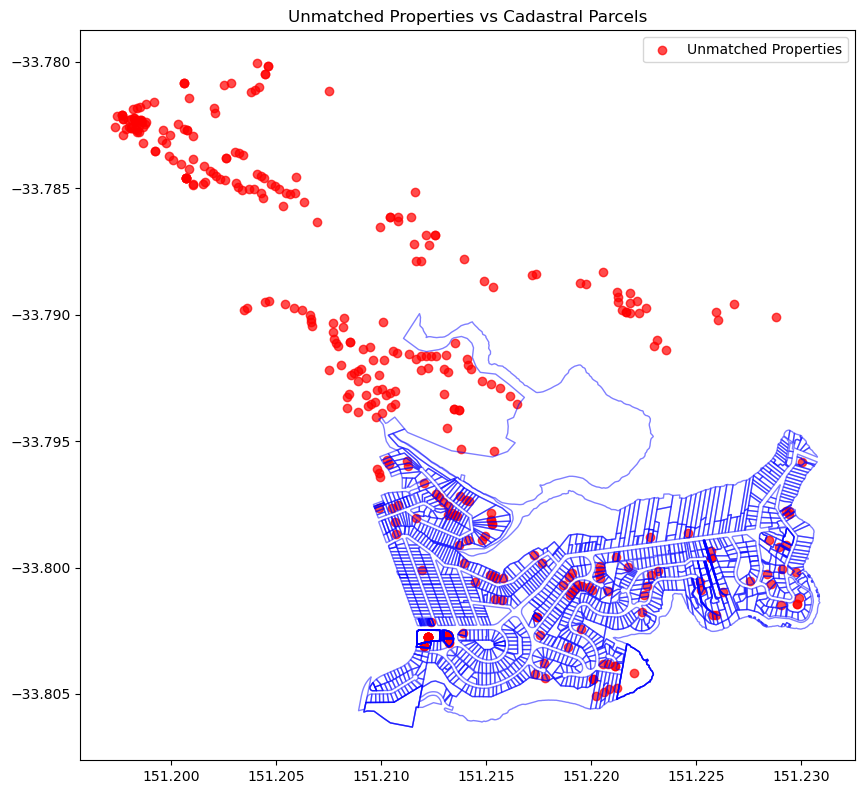


Summary of unmatched properties:
                    address   latitude   longitude
17556    159 DEEPWATER ROAD -33.787781  151.213927
17557        13 THE REDOUBT -33.803760  151.217753
17558         3 THE REDOUBT -33.804229  151.217343
17559         7 THE REDOUBT -33.804353  151.217790
17560  2B GREENFIELD AVENUE -33.792188  151.207511


In [13]:
# Visualize unmatched properties
import matplotlib.pyplot as plt

print("Visualizing unmatched properties...")
fig, ax = plt.subplots(figsize=(10, 10))

# Plot unmatched properties
unmatched_properties.plot(ax=ax, color='red', label='Unmatched Properties', alpha=0.7)

# Overlay cadastral parcels
cadastre_gdf.plot(ax=ax, color='none', edgecolor='blue', label='Cadastral Parcels', alpha=0.5)

plt.legend()
plt.title("Unmatched Properties vs Cadastral Parcels")
plt.show()

# Summary of unmatched properties
print("\nSummary of unmatched properties:")
print(unmatched_properties[['address', 'latitude', 'longitude']].head())

## 8. Conclusion

The analysis successfully matched most properties to cadastral parcels and determined their orientations. However, some properties remain unmatched, likely due to data coverage gaps or coordinate mismatches. Further investigation of unmatched properties is recommended to improve the analysis.